In [1]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
print (torch.__version__)
print (torchvision.__version__)

import matplotlib.pyplot as plt
import numpy as np

0.4.0
0.2.1


In [3]:
%timeit
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [4]:
%timeit
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


Files already downloaded and verified


In [5]:
%timeit
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


In [6]:
%timeit
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


Files already downloaded and verified


In [7]:
%timeit
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print (type(classes))

<class 'tuple'>


  dog   car  deer  frog


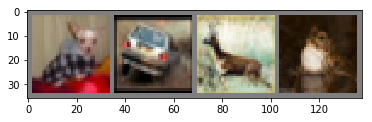

In [9]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        network_width = 6
        self.conv1 = nn.Conv2d(3, network_width, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(network_width, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
%timeit
stored_loss = []
num_epochs = 12 #was 2 originally
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            stored_loss.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.183
[1,  4000] loss: 1.827
[1,  6000] loss: 1.685
[1,  8000] loss: 1.574
[1, 10000] loss: 1.498
[1, 12000] loss: 1.476
[2,  2000] loss: 1.404
[2,  4000] loss: 1.361
[2,  6000] loss: 1.332
[2,  8000] loss: 1.305
[2, 10000] loss: 1.289
[2, 12000] loss: 1.266
[3,  2000] loss: 1.201
[3,  4000] loss: 1.199
[3,  6000] loss: 1.191
[3,  8000] loss: 1.199
[3, 10000] loss: 1.175
[3, 12000] loss: 1.158
[4,  2000] loss: 1.085
[4,  4000] loss: 1.091
[4,  6000] loss: 1.112
[4,  8000] loss: 1.097
[4, 10000] loss: 1.104
[4, 12000] loss: 1.071
[5,  2000] loss: 1.012
[5,  4000] loss: 1.000
[5,  6000] loss: 1.023
[5,  8000] loss: 1.047
[5, 10000] loss: 1.025
[5, 12000] loss: 1.027
[6,  2000] loss: 0.952
[6,  4000] loss: 0.949
[6,  6000] loss: 0.977
[6,  8000] loss: 0.978
[6, 10000] loss: 0.979
[6, 12000] loss: 0.994
[7,  2000] loss: 0.901
[7,  4000] loss: 0.880
[7,  6000] loss: 0.916
[7,  8000] loss: 0.926
[7, 10000] loss: 0.938
[7, 12000] loss: 0.959
[8,  2000] loss: 0.826
[8,  4000] 

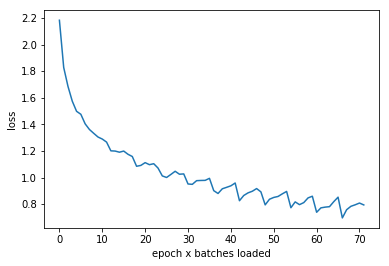

In [13]:
import matplotlib.pyplot as plt
plt.plot(stored_loss)
plt.ylabel('loss')
plt.xlabel('epoch x batches loaded')
plt.show()


GroundTruth:    cat  ship  ship plane


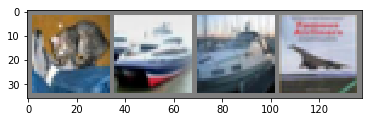

In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog  ship  ship  ship


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 69 %
Accuracy of  bird : 44 %
Accuracy of   cat : 48 %
Accuracy of  deer : 68 %
Accuracy of   dog : 39 %
Accuracy of  frog : 69 %
Accuracy of horse : 70 %
Accuracy of  ship : 81 %
Accuracy of truck : 73 %


In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cpu


In [20]:
#net.to(device)

In [21]:
#inputs, labels = inputs.to(device), labels.to(device)

In [22]:
%timeit
stored_loss = []
num_epochs = 6 #was 2 originally
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            stored_loss.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.692
[1,  4000] loss: 0.720
[1,  6000] loss: 0.741
[1,  8000] loss: 0.775
[1, 10000] loss: 0.783
[1, 12000] loss: 0.793
[2,  2000] loss: 0.665
[2,  4000] loss: 0.716
[2,  6000] loss: 0.726
[2,  8000] loss: 0.760
[2, 10000] loss: 0.765
[2, 12000] loss: 0.785
[3,  2000] loss: 0.645
[3,  4000] loss: 0.692
[3,  6000] loss: 0.701
[3,  8000] loss: 0.723
[3, 10000] loss: 0.741
[3, 12000] loss: 0.769
[4,  2000] loss: 0.642
[4,  4000] loss: 0.668
[4,  6000] loss: 0.706
[4,  8000] loss: 0.714
[4, 10000] loss: 0.725
[4, 12000] loss: 0.748
[5,  2000] loss: 0.637
[5,  4000] loss: 0.667
[5,  6000] loss: 0.701
[5,  8000] loss: 0.693
[5, 10000] loss: 0.748
[5, 12000] loss: 0.721
[6,  2000] loss: 0.615
[6,  4000] loss: 0.652
[6,  6000] loss: 0.677
[6,  8000] loss: 0.691
[6, 10000] loss: 0.704
[6, 12000] loss: 0.749
Finished Training


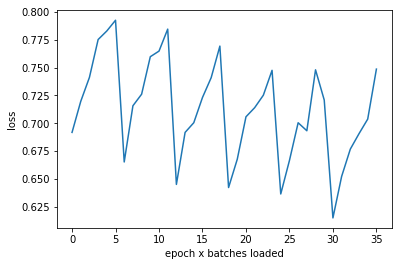

In [23]:
import matplotlib.pyplot as plt
plt.plot(stored_loss)
plt.ylabel('loss')
plt.xlabel('epoch x batches loaded')
plt.show()

In [24]:
outputs = net(images)

In [25]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   dog plane horse


In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 75 %
Accuracy of  bird : 50 %
Accuracy of   cat : 44 %
Accuracy of  deer : 52 %
Accuracy of   dog : 42 %
Accuracy of  frog : 78 %
Accuracy of horse : 67 %
Accuracy of  ship : 80 %
Accuracy of truck : 63 %
